# What happens if we have a Whale Attack?

The Malicious Whale Test:
“Moby Dick” buys up a large portion of the RAI supply and uses it to forcibly hold the market price at a constant, we consider 4 controller types and verify that the whale expects to LOSE
grid 2 x 2
positive vs negative Ki
leaky integral vs no leaky integral
result
all tests pass except -Ki w/ no leak

## Beginning of new work

In [1]:
%load_ext autotime

time: 970 µs (started: 2021-04-02 15:34:29 -03:00)


In [2]:
# Dependences
import pandas as pd
import numpy as np
import inspect

# Experiments
from model import run
from model import sys_params 
import plotly.express as px
df = run.run()
#rdf = run.postprocessing(df)

ModuleNotFoundError: No module named 'model'

time: 1.22 s (started: 2021-04-02 15:34:29 -03:00)


In [2]:
ldf= df[df.substep==df.substep.max()]

In [3]:
ldf.head()

price  target  error  integral      Dt                  timestamp  \
3       4    3.49  -0.51  -1820.39 3617.00 2021-03-12 16:09:42.498978   
6       4    3.49  -0.51  -3481.26 3600.00 2021-03-12 17:09:42.856966   
9       4    3.48  -0.52  -5012.81 3614.00 2021-03-12 18:09:57.255449   
12      4    3.47  -0.53  -6422.18 3617.00 2021-03-12 19:10:14.485137   
15      4    3.47  -0.53  -7713.55 3600.00 2021-03-12 20:10:14.527074   

    price_adjustment_rate  simulation  subset  run  substep  timestep  
3                   -0.00           0       0    1        3         1  
6                   -0.00           0       0    1        3         2  
9                   -0.00           0       0    1        3         3  
12                  -0.00           0       0    1        3         4  
15                  -0.00           0       0    1        3         5

In [4]:
ldf.subset.unique()

array([0, 1, 2, 3])

In [5]:
ldf=ldf.dropna()
endtimes = ldf[ldf.subset==2].timestep.max()

In [6]:
endtimes

348

In [7]:
cutoff = 320
ldf['drop'] = (ldf.subset.apply(lambda x: x==2))&(ldf.timestep.apply(lambda x: x> cutoff))

ldf = ldf[~ldf['drop']].copy()

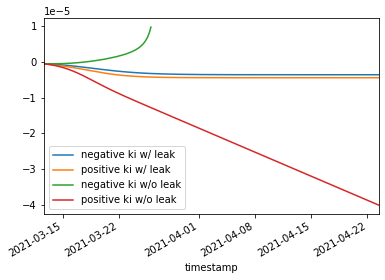

In [8]:
ldf[ldf.subset==0].plot(x='timestamp', y='price_adjustment_rate')
ax = plt.gca()
ldf[ldf.subset==1].plot(x='timestamp', y='price_adjustment_rate', ax=ax)
ldf[ldf.subset==2].plot(x='timestamp', y='price_adjustment_rate', ax=ax)
ldf[ldf.subset==3].plot(x='timestamp', y='price_adjustment_rate', ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

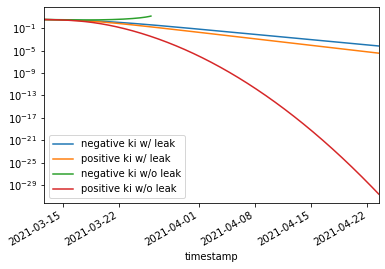

In [9]:
ldf[ldf.subset==0].plot(x='timestamp', y='target', logy=True)
ax = plt.gca()
ldf[ldf.subset==1].plot(x='timestamp', y='target', logy=True,ax=ax)
ldf[ldf.subset==2].plot(x='timestamp', y='target', logy=True, ax=ax)
ldf[ldf.subset==3].plot(x='timestamp', y='target', logy=True, ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

After we run the simulation, certain post processing steps should be taken, as shown below:

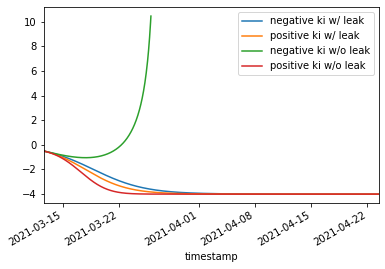

In [10]:
ldf[ldf.subset==0].plot(x='timestamp', y='error')
ax = plt.gca()
ldf[ldf.subset==1].plot(x='timestamp', y='error',ax=ax)
ldf[ldf.subset==2].plot(x='timestamp', y='error',  ax=ax)
ldf[ldf.subset==3].plot(x='timestamp', y='error', ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

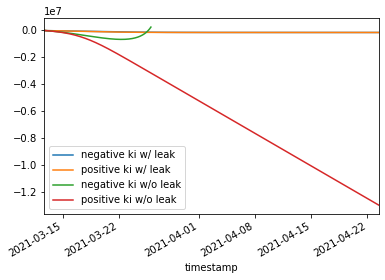

In [11]:
ldf[ldf.subset==0].plot(x='timestamp', y='integral')
ax = plt.gca()
ldf[ldf.subset==1].plot(x='timestamp', y='integral',ax=ax)
ldf[ldf.subset==2].plot(x='timestamp', y='integral',  ax=ax)
ldf[ldf.subset==3].plot(x='timestamp', y='integral', ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

In [12]:
sdf = ldf[ldf.timestep <50].copy()

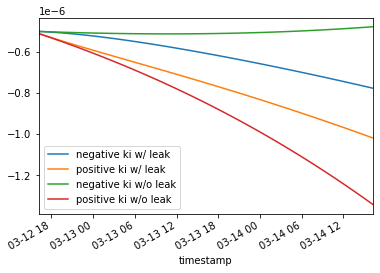

In [13]:
sdf[sdf.subset==0].plot(x='timestamp', y='price_adjustment_rate')
ax = plt.gca()
sdf[sdf.subset==1].plot(x='timestamp', y='price_adjustment_rate', ax=ax)
sdf[sdf.subset==2].plot(x='timestamp', y='price_adjustment_rate', ax=ax)
sdf[sdf.subset==3].plot(x='timestamp', y='price_adjustment_rate', ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

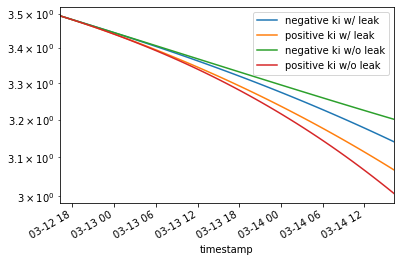

In [14]:
sdf[sdf.subset==0].plot(x='timestamp', y='target', logy=True)
ax = plt.gca()
sdf[sdf.subset==1].plot(x='timestamp', y='target', logy=True,ax=ax)
sdf[sdf.subset==2].plot(x='timestamp', y='target', logy=True, ax=ax)
sdf[sdf.subset==3].plot(x='timestamp', y='target', logy=True, ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

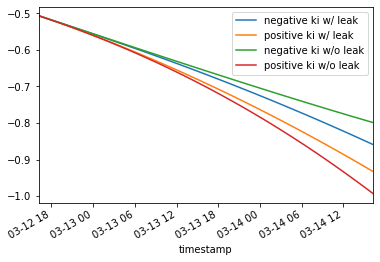

In [15]:
sdf[sdf.subset==0].plot(x='timestamp', y='error')
ax = plt.gca()
sdf[sdf.subset==1].plot(x='timestamp', y='error',ax=ax)
sdf[sdf.subset==2].plot(x='timestamp', y='error',  ax=ax)
sdf[sdf.subset==3].plot(x='timestamp', y='error', ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

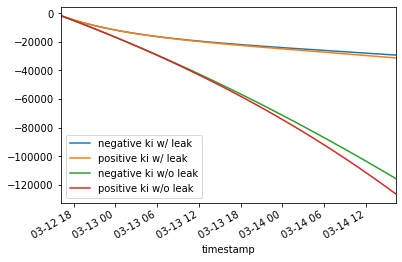

In [16]:
sdf[sdf.subset==0].plot(x='timestamp', y='integral')
ax = plt.gca()
sdf[sdf.subset==1].plot(x='timestamp', y='integral',ax=ax)
sdf[sdf.subset==2].plot(x='timestamp', y='integral',  ax=ax)
sdf[sdf.subset==3].plot(x='timestamp', y='integral', ax=ax)
plt.legend(['negative ki w/ leak', 'positive ki w/ leak', 'negative ki w/o leak', 'positive ki w/o leak'])

## end of my new work

In [3]:
from model.run import postprocessing
function = inspect.getsource(postprocessing)
print(function)

def postprocessing(df):
    '''
    Definition:
    Refine and extract metrics from the simulation
    
    Parameters:
    df: simulation dataframe
    '''

    #rdf = df[df.substep == df.substep.max()]
    rdf = df[df.substep<=1]
    rdf = rdf.drop_duplicates(subset=['simulation','run', 'substep', 'timestep'])
    
    rdf['normed_integral'] = rdf.integral.apply(lambda x: x/(initial_values['TOK']*initial_values['SPH']))
    rdf['normed_price'] = rdf.price.apply(lambda x: x/initial_values['TOK'])
    rdf['normed_target'] = rdf.target.apply(lambda x: x/initial_values['TOK'])
    rdf['normed_error']  = rdf.normed_price-rdf.normed_target
    
    rdf['new_error'] = rdf.error.apply(lambda x: x['new'])
    rdf['old_error'] = rdf.error.apply(lambda x: ['old'])

    rdf['normed_new_error'] = rdf.error.apply(lambda x: float(x['new']/initial_values['TOK']))
    rdf['normed_old_error'] = rdf.error.apply(lambda x: float(x['old']/initial_values['TOK']))

    rdf['mean_error'] = rdf.error.apply(la

## Analyze Result

Below is the refined pandas dataframe

In [4]:
rdf.tail()

price                        target  \
286   999211530195716959610339328  1000000000000000000000000000   
289  1000981250954666997574533120  1000000000000000000000000000   
292  1000515157684551019900436480  1000000000000000000000000000   
295   997520779891044160481787904  1000000000000000000000000000   
298   998020483513873200977018880  1000000000000000000000000000   

                                                 error  \
286  {'new': -788469804283040389660672, 'old': 1201...   
289  {'new': 981250954666997574533120, 'old': -7884...   
292  {'new': 515157684551019900436480, 'old': 98125...   
295  {'new': -2479220108955839518212096, 'old': 515...   
298  {'new': -1979516486126799022981120, 'old': -24...   

                            integral      Dt                  timestamp  \
286  9728801005144707249995776000.00 3621.00 2020-10-10 14:35:54.816321   
289 10477234400997577308824928256.00 3612.00 2020-10-10 15:36:07.659041   
292 10825397158591004093689364480.00 3612.00 2020-10-10 16:36:19.838179   
295 13527911161018744037347164160.00 3603.00 2020-10-10 17:36:23.503033   
298  9989652703453461174741368832.00 3609.00 2020-10-10 18:36:32.877158   

     simulation  subset  run  substep  ...  normed_price  normed_target  \
286           0       0    1        1  ...          1.00           1.00   
289           0       0    1        1  ...          1.00           1.00   
292           0       0    1        1  ...          1.00           1.00   
295           0       0    1        1  ...          1.00           1.00   
298           0       0    1        1  ...          1.00           1.00   

     normed_error                   new_error  old_error normed_new_error  \
286         -0.00   -788469804283040389660672      [old]            -0.00   
289          0.00    981250954666997574533120      [old]             0.00   
292          0.00    515157684551019900436480      [old]             0.00   
295         -0.00  -2479220108955839518212096      [old]            -0.00   
298         -0.00  -1979516486126799022981120      [old]            -0.00   

    normed_old_error                  mean_error  \
286             0.00    206692459500930777219072   
289            -0.00     96390575191978592436224   
292             0.00    748204319609008737484800   
295             0.00   -982031212202409808887808   
298            -0.00  -2229368297541319136378880   

                  cast_mean_error normed_mean_error  
286   206692459500930777219072.00              0.00  
289    96390575191978592436224.00              0.00  
292   748204319609008737484800.00              0.00  
295  -982031212202409808887808.00             -0.00  
298 -2229368297541319136378880.00             -0.00  

[5 rows x 22 columns]

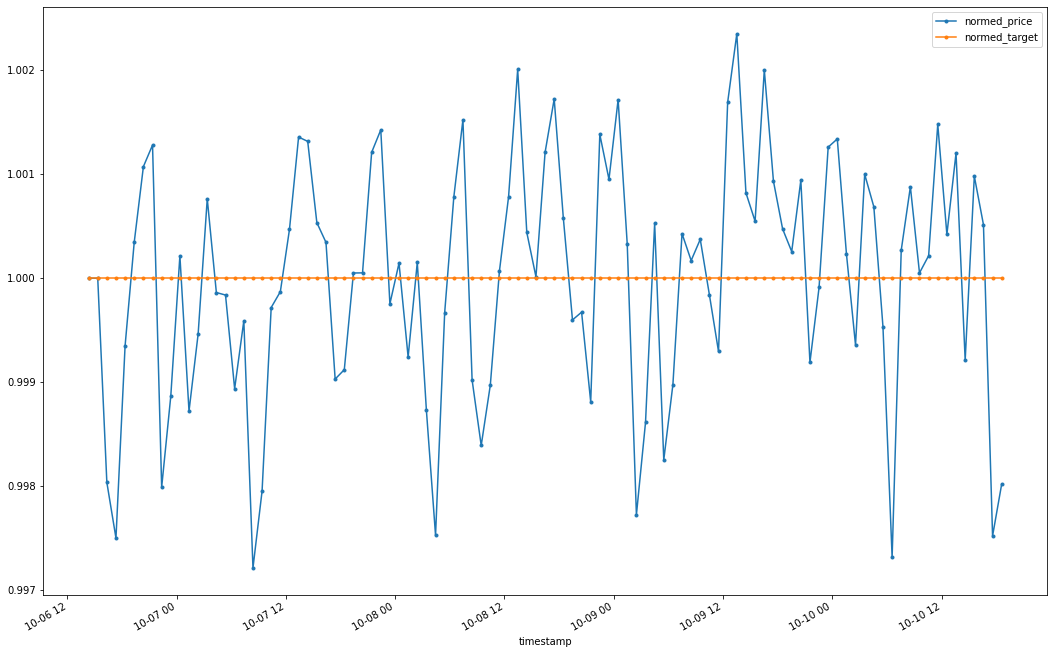

In [5]:
plt.figure(figsize=(18, 12))
rdf.plot(x='timestamp', y=['normed_price','normed_target'], marker='.', ax=plt.gca())

In the above plot, we show our martingle process or random walk, for price and compare to the target, which is stable. Below we show our martingale process code, as implemented in our cadCAD code. We normalize the price and target by dividing the price or target by TOK, which is 10**27.

In [6]:
from model.parts.system import martingale
function = inspect.getsource(martingale)
print(function)

def martingale(params, step, sL, s):

    theta = params['correction_wt']
    noise = np.random.randn()*params['noise_wt']
    raw_price = float(s['price'])/params['TOK']
    raw_target = float(s['target'])/params['TOK']

    raw_price = theta*raw_target+(1-theta)*raw_price + noise
    
    return({'raw_price':raw_price})



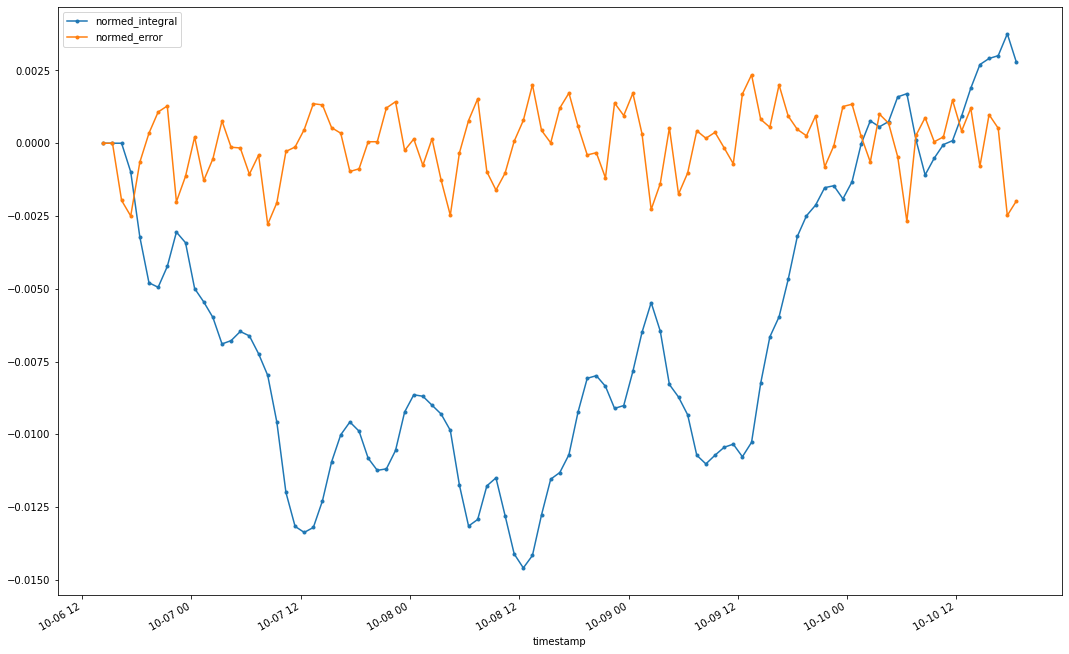

In [7]:
plt.figure(figsize=(18, 12))
rdf.plot(x='timestamp', y=['normed_integral','normed_error'], marker='.', ax=plt.gca())

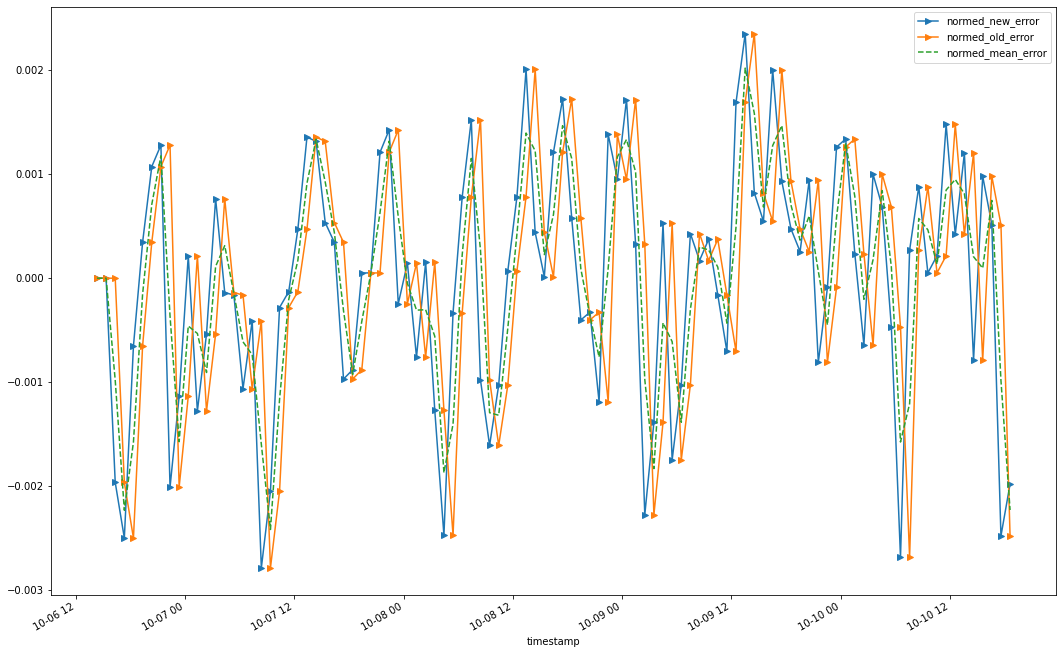

In [8]:
plt.figure(figsize=(18, 12))
rdf[['normed_new_error','normed_old_error','timestamp']].plot(x='timestamp', marker='>', ax=plt.gca())
rdf[['normed_mean_error','timestamp']].plot(x='timestamp', marker=None, linestyle='--', ax=plt.gca())

Text(0, 0.5, 'Observed Error in 1/RAY')

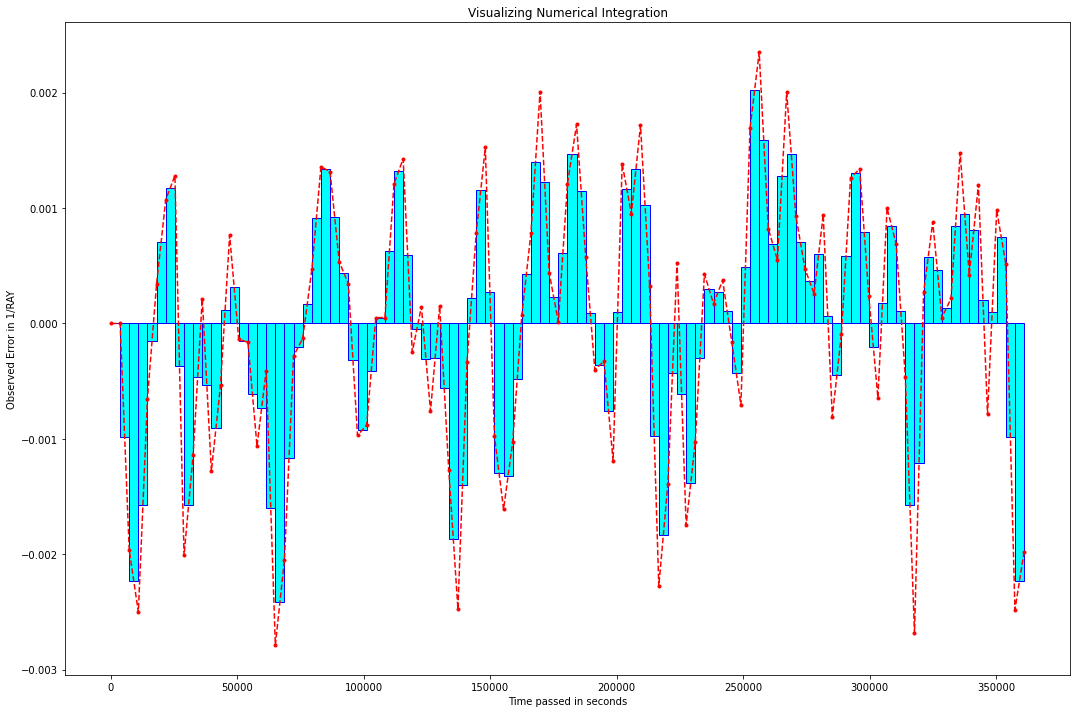

In [9]:
rdf['seconds'] = rdf.Dt.cumsum()


x=rdf.seconds.values
y=rdf.normed_error.values
h=rdf.normed_mean_error.values
w=rdf.Dt.values

plt.figure(figsize=(18, 12))
plt.plot(x,y , marker='.',linestyle='--', color='r')

ax = plt.gca()

for p in range(len(x)-1):
    ax.add_patch(
        Rectangle(
        (x[p], 0),
        w[p+1],
        h[p+1],
        edgecolor = 'blue',
        facecolor = 'cyan',
        fill=True
     ) )

plt.title('Visualizing Numerical Integration')
plt.xlabel('Time passed in seconds')
plt.ylabel('Observed Error in 1/RAY')


## Conclusion
In this notebook, we've provided an overview of integration and numerical integration, created a cadCAD model to illustrate numerical integration, ran the simulation, plotted and analysed the results.